In [ ]:
from google.colab import drive
drive.mount('gdrive')
%cd /content/gdrive/'My Drive'/Dataset

Mounted at gdrive
/content/gdrive/My Drive/Dataset


In [ ]:
%ls

abc10.png  abc3.png  abc6.png  abc9.png       PRSA_data_2010.1.1-2014.12.31.csv
abc1.png   abc4.png  abc7.png  dataset_1.mat
abc2.png   abc5.png  abc8.png  dataset_2.mat


In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy.io as sio
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import random

In [ ]:
data = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")
del data['No']

In [ ]:
data['pm2.5'].fillna((data['pm2.5'].mean()), inplace=True)

In [ ]:
data["cbwd"].replace("NW", "0", inplace=True)
data["cbwd"].replace("cv", "1", inplace=True)
data["cbwd"].replace("NE", "2", inplace=True)
data["cbwd"].replace("SE", "3", inplace=True)

In [ ]:
print(data)

       year  month  day  hour      pm2.5  ...    PRES  cbwd     Iws Is  Ir
0      2010      1    1     0  98.613215  ...  1021.0     0    1.79  0   0
1      2010      1    1     1  98.613215  ...  1020.0     0    4.92  0   0
2      2010      1    1     2  98.613215  ...  1019.0     0    6.71  0   0
3      2010      1    1     3  98.613215  ...  1019.0     0    9.84  0   0
4      2010      1    1     4  98.613215  ...  1018.0     0   12.97  0   0
...     ...    ...  ...   ...        ...  ...     ...   ...     ... ..  ..
43819  2014     12   31    19   8.000000  ...  1034.0     0  231.97  0   0
43820  2014     12   31    20  10.000000  ...  1034.0     0  237.78  0   0
43821  2014     12   31    21  10.000000  ...  1034.0     0  242.70  0   0
43822  2014     12   31    22   8.000000  ...  1034.0     0  246.72  0   0
43823  2014     12   31    23  12.000000  ...  1034.0     0  249.85  0   0

[43824 rows x 12 columns]


In [ ]:
def traintestsplit(df):
  shuffle = np.random.permutation(len(df))
  test_size = int(len(df) * 0.2)
  test_aux = shuffle[:test_size]
  train_aux = shuffle[test_size:]
  TRAIN_DF =df.iloc[train_aux]
  TEST_DF = df.iloc[test_aux]
  print(len(TRAIN_DF))
  print(len(TEST_DF))
  return TRAIN_DF, TEST_DF

In [ ]:
train, test = traintestsplit(data)
features = ['year', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']
xtrain = train[features]
xtest = test[features]
ytrain = train.month
ytest = test.month
print(xtrain)
print(ytrain)

35060
8764
       year  day  hour  pm2.5  DEWP  TEMP    PRES     Iws  Is  Ir
22091  2012    9    11  104.0    24  25.0  1003.0    1.79   0   0
4799   2010   19    23   50.0    20  22.0  1005.0    1.79   0   1
36875  2014   17    11  124.0   -10  16.0  1012.0   20.12   0   0
26976  2013   29     0  508.0    -6  -6.0  1024.0    1.78   0   0
6183   2010   15    15  236.0    19  30.0  1009.0   23.25   0   0
...     ...  ...   ...    ...   ...   ...     ...     ...  ..  ..
27146  2013    5     2   60.0    -6  -3.0  1026.0   23.69   0   0
22940  2012   13    20   33.0    18  22.0  1009.0    0.89   0   0
29052  2013   25    12   10.0    -9  21.0  1013.0  113.53   0   0
3235   2010   15    19  117.0    10  24.0  1011.0   14.30   0   0
23429  2012    3     5    6.0    10  17.0  1012.0   18.32   0   0

[35060 rows x 10 columns]
22091    7
4799     7
36875    3
26976    1
6183     9
        ..
27146    2
22940    8
29052    4
3235     5
23429    9
Name: month, Length: 35060, dtype: int64


In [ ]:
def dt(xtrain, ytrain):
  # Create Decision Tree classifer object
  clf = DecisionTreeClassifier(criterion="entropy")

  # Train Decision Tree Classifer
  clf = clf.fit(xtrain,ytrain)

  #Predict the response for test dataset
  y_predict = clf.predict(xtest)
  return y_predict

In [ ]:
def findAccuracy(ytest, y_predict):
  ptr = 0
  neg = 0
  total = len(ytest)
  for i in ytest:
    if(i != y_predict[ptr]):
      neg+=1
    ptr+=1
  return (total - neg)/total

In [ ]:
y_predict = dt(xtrain, ytrain)
print(findAccuracy(ytest, y_predict)*100)

85.06389776357828


# b) Find Accuracy at different levels

In [ ]:
# For Ploting
plot_x = []
plot_y = []

In [ ]:
def dt2(xtrain, ytrain, depth):
  # Create Decision Tree classifer object
  clf = DecisionTreeClassifier(max_depth=depth)

  # Train Decision Tree Classifer
  clf = clf.fit(xtrain,ytrain)

  #Predict the response for test dataset
  y_predict = clf.predict(xtest)
  plot_x.append(clf.tree_.max_depth)
  return y_predict

In [ ]:
l = [2, 4, 8, 10, 15, 30]
for i in l:
  y_predict = dt2(xtrain, ytrain, i)
  #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  plot_y.append(findAccuracy(ytest, y_predict)*100)
print(plot_x)
print(plot_y)

[2, 4, 8, 10, 15, 24]
[27.761296211775445, 39.02327704244637, 57.462345960748515, 67.18393427658603, 81.73208580556823, 84.56184390689184]


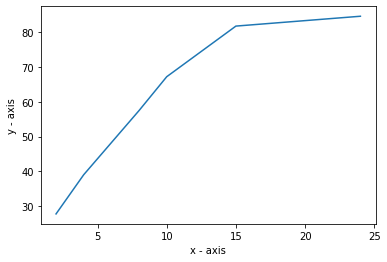

In [ ]:
plt.plot(plot_x, plot_y) 
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
plt.show()

In [ ]:
plot_train_x = []
plot_train_y = []

In [ ]:
def dt3(xtrain, ytrain, depth):
  # Create Decision Tree classifer object
  clf = DecisionTreeClassifier(max_depth=depth)

  # Train Decision Tree Classifer
  clf = clf.fit(xtrain,ytrain)

  #Predict the response for test dataset
  y_predict = clf.predict(xtrain)
  plot_train_x.append(clf.tree_.max_depth)
  return y_predict

In [ ]:
l = [2, 4, 8, 10, 15, 30]
for i in l:
  y_predict = dt3(xtrain, ytrain, i)
  plot_train_y.append(findAccuracy(ytrain, y_predict)*100)

[7 7 3 ... 4 5 9]


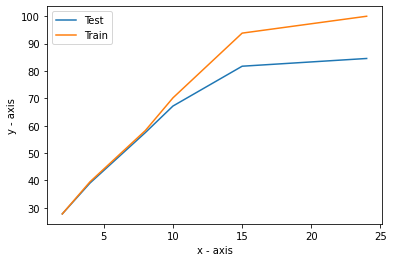

In [ ]:
plt.plot(plot_x, plot_y, label = "Test")
plt.plot(plot_train_x, plot_train_y, label = "Train")
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis')
plt.legend()
plt.show()

## c) 100 Trees depth 3

In [ ]:
def dt100(xtrain, ytrain, depth, xtest):
  # Create Decision Tree classifer object
  clf = DecisionTreeClassifier(max_depth=depth)

  # Train Decision Tree Classifer
  clf = clf.fit(xtrain,ytrain)
  
  #Predict the response for test dataset
  y_predict = clf.predict(xtest)
  return y_predict

In [ ]:
def most_frequent(List): 
    return max(set(List), key = List.count)

In [ ]:
output = []
y_predict = []

In [ ]:
for i in range(100):
  newtrain = train.sample(frac = 0.50, random_state=i)
  xnewtrain = newtrain[features]
  ynewtrain = newtrain.month
  output.append(dt100(xnewtrain, ynewtrain, 3, xtest))

print(len(output))
print(len(output[0]))
for i in range(len(xtest)):
  temp = []
  for j in range(100):
    temp.append(output[j][i])
  y_predict.append(most_frequent(temp))

print(findAccuracy(ytest, y_predict)*100)

100
8764


## d) Multiple depth values

In [ ]:
def customRandomForest(depth):
  output = []
  y_predict = []
  for i in range(100):
    newtrain = train.sample(frac = 0.50, random_state=i)
    xnewtrain = newtrain[features]
    ynewtrain = newtrain.month
    output.append(dt100(xnewtrain, ynewtrain, depth, xtest))

  for i in range(len(xtest)):
    temp = []
    for j in range(100):
      temp.append(output[j][i])
    y_predict.append(most_frequent(temp))

  print(findAccuracy(ytest, y_predict)*100)

In [ ]:
l = [4, 8, 10, 15, 20]
for d in l:
  customRandomForest(d)

39.94751255134641
64.71930625285258
76.30077590141488
91.60200821542675
93.33637608397993


# Extra

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def randomforest(xtrain, ytrain):
  # Create Decision Tree classifer object
  clf = RandomForestClassifier(n_estimators=100)

  # Train Decision Tree Classifer
  clf = clf.fit(xtrain,ytrain)

  #Predict the response for test dataset
  y_predict = clf.predict(xtest)
  #print(clf.tree_.max_depth)
  return y_predict

In [ ]:
y_predict = randomforest(xtrain, ytrain)
print(findAccuracy(ytest, y_predict)*100)

95.12779552715655
